In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import itertools

In [2]:
def get_FE_profile(filename, ref_vol):
    df = pd.read_csv(filename, sep='\s+')
    df = df.dropna()
    df = df.reset_index()
    df['avg_press'] *= 101325
    closest_to_zero = (df['volume'] - ref_vol).apply(abs)
    rel_id = closest_to_zero.argmin()
    df['volume'] *= (1e-10)**3

    free_eng_list = [0]
    for i in range(1,len(df['avg_press'])):
        free_eng_list.append(-integrate.trapz(df['avg_press'].array[:i], x=df['volume'].array[:i]))
        
    free_eng = np.array(free_eng_list)
    free_eng *= 6.022e23 / 1000
    #free_eng -= min(free_eng)
    free_eng -= free_eng[rel_id]

    return df.copy(), free_eng

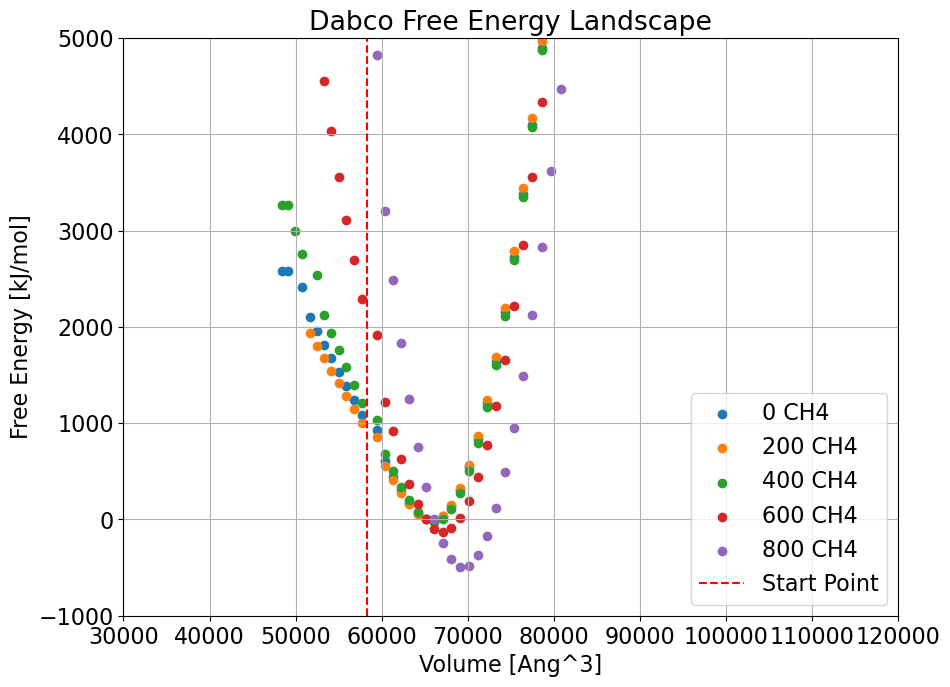

--------------------------------------------
df_0
36.43498653797307 2578.161526137419
36.63498699873637 2578.161526137419
37.0349873582615 2413.3304824125917
37.23498750932925 2101.8338943745352
37.43498780061555 1956.6994372738613
37.63498799229612 1814.6181143567342
37.834988320331085 1676.1142050059925
38.03498854998227 1535.8757527223995
38.234988684275514 1389.6036714831373
38.434988951787716 1240.8125259432863
38.634989125055604 1086.2291853996803
39.03498963774213 927.9112145994538
39.23498975719081 603.1606587790823
39.43499000336306 443.6740126481923
39.6349901602254 301.9584111719132
39.834990440487104 172.0597948331565
40.034990632465856 63.06475703339356
40.234990738746596 0.0
40.434990965713155 -11.041962072335537
40.63499130979486 32.129714521049664
40.83499136772493 137.12380825312312
41.034991543715215 306.71484473714054
41.234991834330145 541.2611150157518
41.434992042080424 839.8332217981063
41.63499216930839 1206.2668952868894
41.83499240874782 1643.3666070579084
42.

In [3]:
#df_0, free_eng_0 = get_FE_profile('Dabco_FreeEnergy_0.txt', 95000)
data_dir = 'FreeEnergy_May_data'
df_0, free_eng_0 = get_FE_profile(data_dir + '/pressures_Dabco_0mol.txt', 65000)
df_200, free_eng_200 = get_FE_profile(data_dir + '/pressures_Dabco_200mol.txt', 65000)
df_400, free_eng_400 = get_FE_profile(data_dir + '/pressures_Dabco_400mol.txt', 65000)
df_600, free_eng_600 = get_FE_profile(data_dir + '/pressures_Dabco_600mol.txt', 65000)
df_800, free_eng_800 = get_FE_profile(data_dir + '/pressures_Dabco_800mol.txt', 66000)
df_1000, free_eng_1000 = get_FE_profile(data_dir + '/pressures_Dabco_1000mol.txt', 72000)
df_1200, free_eng_1200 = get_FE_profile(data_dir + '/pressures_Dabco_1200mol.txt', 75000)
df_1400, free_eng_1400 = get_FE_profile(data_dir + '/pressures_Dabco_1400mol.txt', 80000)



""""""

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10,7.5))
plt.scatter(df_0['volume']*1e30, free_eng_0, label='0 CH4')
plt.scatter(df_200['volume']*1e30, free_eng_200, label='200 CH4')
plt.scatter(df_400['volume']*1e30, free_eng_400, label='400 CH4')
plt.scatter(df_600['volume']*1e30, free_eng_600, label='600 CH4')
plt.scatter(df_800['volume']*1e30, free_eng_800, label='800 CH4')
plt.plot([58300, 58300], [-1000,5000], 'r--', label='Start Point')
#plt.scatter(df_1000['volume']*1e30, free_eng_1000, label='1000 CH4')
#plt.scatter(df_1200['volume']*1e30, free_eng_1200, label='1200 CH4')
#plt.scatter(df_1400['volume']*1e30, free_eng_1400, label='1400 CH4')
plt.xlabel('Volume [Ang^3]')
plt.ylabel('Free Energy [kJ/mol]')
plt.grid(); plt.ylim((-1000,5000))
plt.xlim((30000,120000))
plt.legend(loc='lower right')
plt.title('Dabco Free Energy Landscape')
plt.savefig('Dabco_FE_Landscape.png', dpi=400)
plt.show()

print("--------------------------------------------")
print("df_0")
for i in range(len(df_0['volume'])):
    print((df_0['volume'].iloc[i]*1e30)**(1/3), free_eng_0[i])

print("--------------------------------------------")
print("df_600")
for i in range(len(df_600['volume'])):
    print((df_600['volume'].iloc[i]*1e30)**(1/3), free_eng_600[i])

print("--------------------------------------------")
print("df_800")
for i in range(len(df_800['volume'])):
    print((df_800['volume'].iloc[i]*1e30)**(1/3), free_eng_800[i])

print("--------------------------------------------")
print("df_1200")
for i in range(len(df_1200['volume'])):
    print((df_1200['volume'].iloc[i]*1e30)**(1/3), free_eng_1200[i])

print("--------------------------------------------")
print("df_1400")
for i in range(len(df_1400['volume'])):
    print((df_1400['volume'].iloc[i]*1e30)**(1/3), free_eng_1400[i])


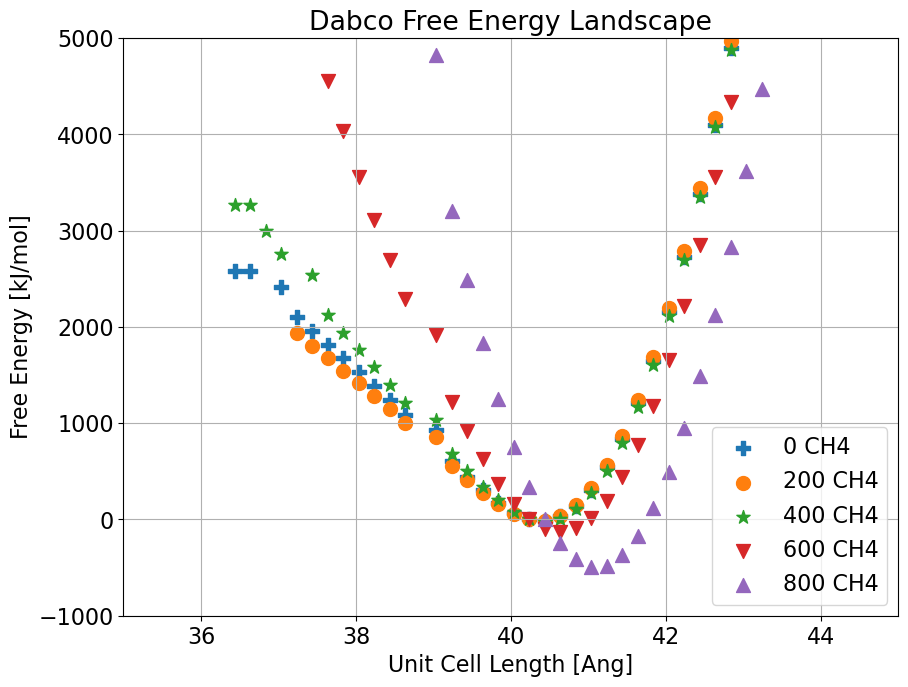

--------------------------------------------
df_0
36.43498653797307 2578.161526137419
36.63498699873637 2578.161526137419
37.0349873582615 2413.3304824125917
37.23498750932925 2101.8338943745352
37.43498780061555 1956.6994372738613
37.63498799229612 1814.6181143567342
37.834988320331085 1676.1142050059925
38.03498854998227 1535.8757527223995
38.234988684275514 1389.6036714831373
38.434988951787716 1240.8125259432863
38.634989125055604 1086.2291853996803
39.03498963774213 927.9112145994538
39.23498975719081 603.1606587790823
39.43499000336306 443.6740126481923
39.6349901602254 301.9584111719132
39.834990440487104 172.0597948331565
40.034990632465856 63.06475703339356
40.234990738746596 0.0
40.434990965713155 -11.041962072335537
40.63499130979486 32.129714521049664
40.83499136772493 137.12380825312312
41.034991543715215 306.71484473714054
41.234991834330145 541.2611150157518
41.434992042080424 839.8332217981063
41.63499216930839 1206.2668952868894
41.83499240874782 1643.3666070579084
42.

In [5]:
marker = itertools.cycle(('P', 'o', '*', 'v', '^', 's', 'p', 'X', 'D'))
plt.rcParams['lines.markersize'] = 10

#df_0, free_eng_0 = get_FE_profile('Dabco_FreeEnergy_0.txt', 95000)
data_dir = 'FreeEnergy_May_data'
df_0, free_eng_0 = get_FE_profile(data_dir + '/pressures_Dabco_0mol.txt', 65000)
df_200, free_eng_200 = get_FE_profile(data_dir + '/pressures_Dabco_200mol.txt', 65000)
df_400, free_eng_400 = get_FE_profile(data_dir + '/pressures_Dabco_400mol.txt', 65000)
df_600, free_eng_600 = get_FE_profile(data_dir + '/pressures_Dabco_600mol.txt', 65000)
df_800, free_eng_800 = get_FE_profile(data_dir + '/pressures_Dabco_800mol.txt', 66000)
df_1000, free_eng_1000 = get_FE_profile(data_dir + '/pressures_Dabco_1000mol.txt', 72000)
df_1200, free_eng_1200 = get_FE_profile(data_dir + '/pressures_Dabco_1200mol.txt', 75000)
df_1400, free_eng_1400 = get_FE_profile(data_dir + '/pressures_Dabco_1400mol.txt', 80000)



""""""

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10,7.5))
n = 1/3
plt.scatter((df_0['volume']*1e30)**n, free_eng_0, label='0 CH4', marker=next(marker))
plt.scatter((df_200['volume']*1e30)**n, free_eng_200, label='200 CH4', marker=next(marker))
plt.scatter((df_400['volume']*1e30)**n, free_eng_400, label='400 CH4', marker=next(marker))
plt.scatter((df_600['volume']*1e30)**n, free_eng_600, label='600 CH4', marker=next(marker))
plt.scatter((df_800['volume']*1e30)**n, free_eng_800, label='800 CH4', marker=next(marker))
#plt.plot(np.array([58300, 58300])**n, [-1000,5000], 'r--', label='Start Point')
#plt.scatter(df_1000['volume']*1e30, free_eng_1000, label='1000 CH4')
#plt.scatter(df_1200['volume']*1e30, free_eng_1200, label='1200 CH4')
#plt.scatter(df_1400['volume']*1e30, free_eng_1400, label='1400 CH4')
plt.xlabel('Unit Cell Length [Ang]')
plt.ylabel('Free Energy [kJ/mol]')
plt.grid(); plt.ylim((-1000,5000))
plt.xlim((35,45))
plt.legend(loc='lower right')
plt.title('Dabco Free Energy Landscape')
plt.savefig('Dabco_FE_Landscape_t2.png', dpi=400)
plt.show()

print("--------------------------------------------")
print("df_0")
for i in range(len(df_0['volume'])):
    print((df_0['volume'].iloc[i]*1e30)**(1/3), free_eng_0[i])

print("--------------------------------------------")
print("df_600")
for i in range(len(df_600['volume'])):
    print((df_600['volume'].iloc[i]*1e30)**(1/3), free_eng_600[i])

print("--------------------------------------------")
print("df_800")
for i in range(len(df_800['volume'])):
    print((df_800['volume'].iloc[i]*1e30)**(1/3), free_eng_800[i])

print("--------------------------------------------")
print("df_1200")
for i in range(len(df_1200['volume'])):
    print((df_1200['volume'].iloc[i]*1e30)**(1/3), free_eng_1200[i])

print("--------------------------------------------")
print("df_1400")
for i in range(len(df_1400['volume'])):
    print((df_1400['volume'].iloc[i]*1e30)**(1/3), free_eng_1400[i])
